In [59]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline
#%matplotlib notebook
from sklearn.model_selection import train_test_split

In [60]:
data = pd.read_csv('../data/df.csv')
# 現在抽出できる特徴量
#data = data[["having_IP_Address", "URL_Length", "Shortining_Service", "having_At_Symbol", "Prefix_Suffix", "URL_of_Anchor", "Submitting_to_email","Iframe", "Result"]]

In [61]:
target = data['Result']

In [62]:
data = data.drop('Result', axis=1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, stratify=target, random_state=66)

## KNeighborsClassifier ##

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

In [66]:
for n_neighbors in neighbors_settings:
    # モデルの構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

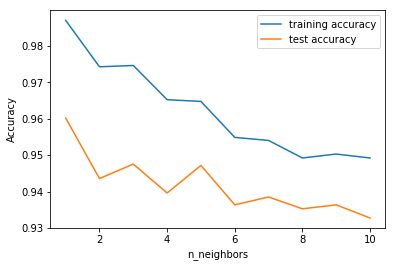

In [67]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 線形回帰( 通常最小二乗法) ##

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr = LinearRegression().fit(X_train, y_train)

In [70]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.0857762  -0.02718533 -0.12593654  0.05572291  0.06461886  0.1112796
  0.08480269  0.42193457 -0.01390779 -0.01419499  0.05878497 -0.037613
  0.05515054  0.48477074  0.1256426   0.13061001 -0.03795554 -0.04845617
 -0.15480857  0.03179954  0.01075033 -0.01745322 -0.04830481  0.00561585
  0.05448731  0.10876081  0.0433579   0.09612232  0.11292359  0.06006482]
lr.intercept_: 0.06326592504198847


In [71]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.70


## リッジ回帰 ##

In [72]:
from sklearn.linear_model import Ridge

In [73]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.70


In [74]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.70


In [75]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.70


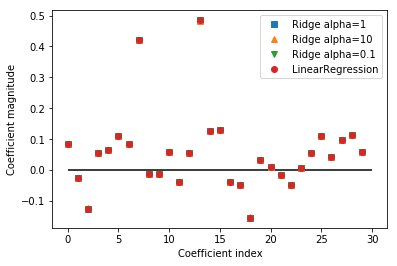

In [76]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()

## Lasso ##

In [77]:
from sklearn.linear_model import Lasso

In [78]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [79]:
# 適合不足を解消するためalphaを減らす
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of featres used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.70
Test set score: 0.69
Number of featres used: 18


In [80]:
# 適合不足を解消するためalphaを減らす
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of featres used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.70
Test set score: 0.70
Number of featres used: 30


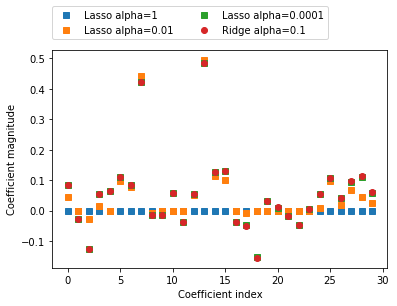

In [81]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 's', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## ロジスティック回帰 ##

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score:0.928
Test set score: 0.932


In [84]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score:0.928
Test set score: 0.932


In [85]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score:0.925
Test set score: 0.928


In [86]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

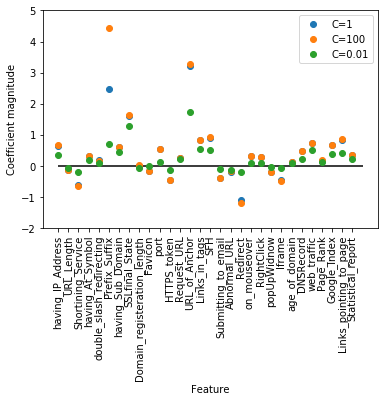

In [87]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, 'o', label='C=100')
plt.plot(logreg001.coef_.T, 'o', label='C=0.01')
plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.hlines(0, 0, data.shape[1])
plt.ylim(-2, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.89
Test accuracy of l1 logreg with C=0.001: 0.89
Training accuracy of l1 logreg with C=1.000: 0.93
Test accuracy of l1 logreg with C=1.000: 0.93
Training accuracy of l1 logreg with C=100.000: 0.93
Test accuracy of l1 logreg with C=100.000: 0.93


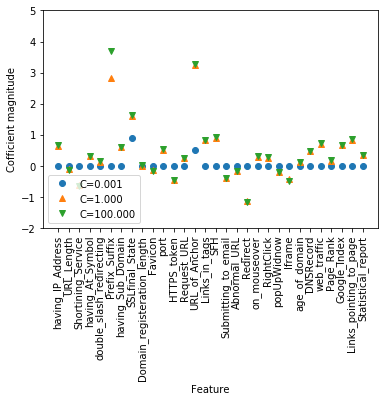

In [88]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Cofficient magnitude")
plt.ylim(-2, 5)
plt.legend(loc=3)

## 決定木 ##

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
tree = DecisionTreeClassifier(random_state=0)

In [91]:
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.966


In [92]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.918
Accuracy on test set: 0.916


In [93]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["normal", "phishing"],
               feature_names=data.columns, impurity=False, filled=True)

In [94]:
import graphviz

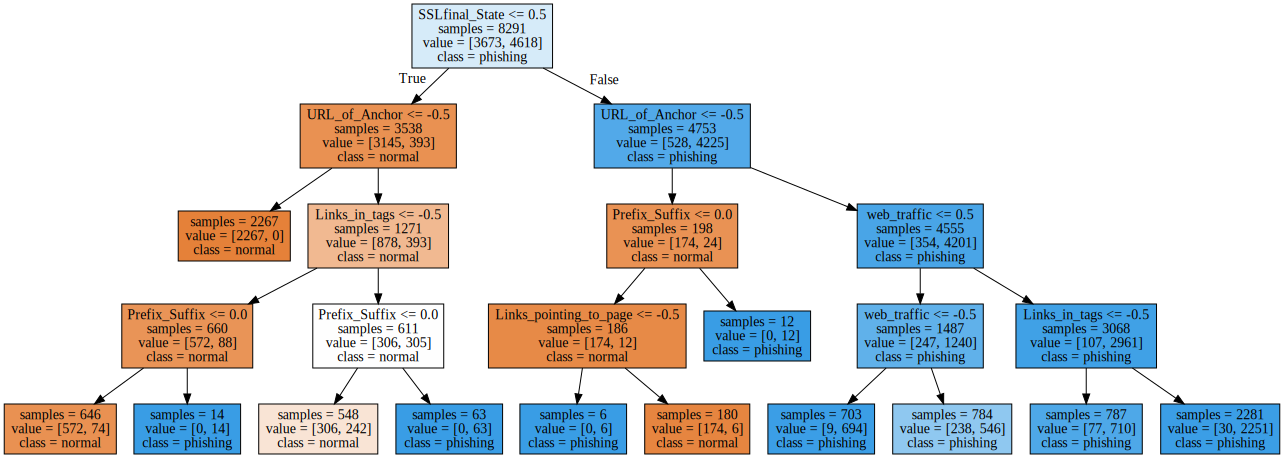

In [95]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [96]:
# 特徴量の重要度
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.02441572
  0.          0.78377814  0.          0.          0.          0.          0.
  0.12750516  0.02980372  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.03103176
  0.          0.          0.0034655   0.        ]


In [97]:
# 特徴量の重要度をグラフ化する関数
def plot_feature_importances_phishing(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

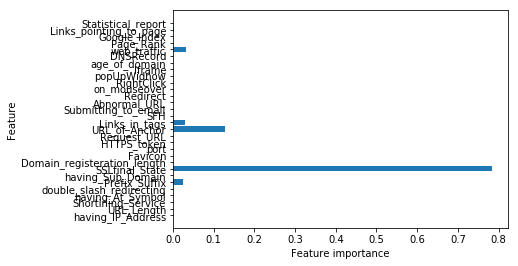

In [98]:
plot_feature_importances_phishing(tree)

## ランダムフォレスト ##

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
# n_estimatorsでデータの個数を決める
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.972


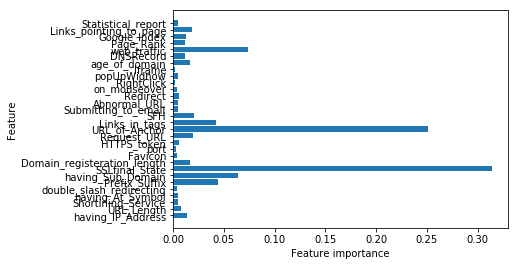

In [101]:
plot_feature_importances_phishing(forest)

## 勾配ブースティング回帰木 ##

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.955
Accuracy on test set: 0.947


In [104]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.928
Accuracy on test set: 0.927


In [105]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=1.4)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.967


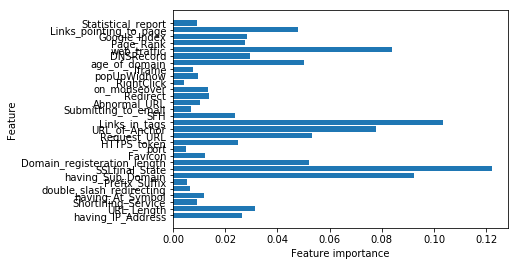

In [106]:
plot_feature_importances_phishing(gbrt)

## ニューラルネットワーク (ディープラーニング) ##

In [107]:
from sklearn.neural_network import MLPClassifier

In [108]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Acccuary on training set : {:.2f}".format(mlp.score(X_train, y_train)))
print("Accucary on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Acccuary on training set : 0.98
Accucary on test set: 0.97


In [109]:
#ニューラルネットワークは平均が0分散が1であるのが理想的.
#  訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これでmean=0, std=1 になる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# まったく同じ変換(訓練データの平均と標準偏差を使って)をテストセットに施す
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.972


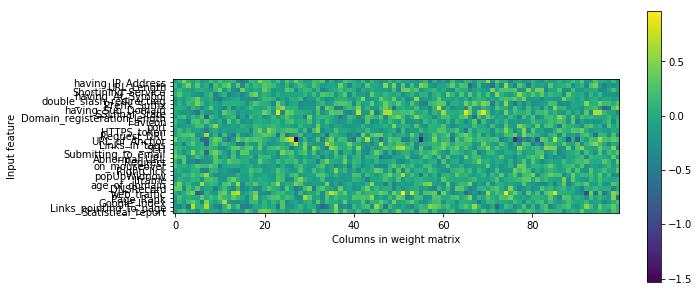

In [110]:
plt.figure(figsize=(10,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(data.shape[1]), data.columns)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()